In [1]:
import treeplot
import pandas as pd
import numpy as np
import math

def loadDataSet(filepath):
    '''
    Returns
    -----------------
    data: 2-D list
        each row is the feature and label of one instance
    featNames: 1-D list
        feature names
    '''
    data=[]
    featNames = None
    fr = open(filepath)
    for (i,line) in enumerate(fr.readlines()):
        array=line.strip().split(',')
        if i == 0:
            featNames = array[:-1]
        else:
            data.append(array)
    return data, featNames

In [2]:
def splitData(dataSet, axis, value):
    '''
    Split the dataset based on the given axis and feature value

    Parameters
    -----------------
    dataSet: 2-D list
        [n_sampels, m_features + 1]
        the last column is class label
    axis: int 
        index of which feature to split on
    value: string
        the feature value to split on

    Returns
    ------------------
    subset: 2-D list 
        the subset of data by selecting the instances that have the given feature value
        and removing the given feature columns
    '''
    subset = []
    for instance in dataSet:
        if instance[axis] == value:    # if contains the given feature value
            reducedVec = instance[:axis] + instance[axis+1:] # remove the given axis
            subset.append(reducedVec)
    return subset

In [3]:
def gini(data):
    df= pd.DataFrame(data)
    square=0
    for value in df.iloc[:,-1].unique() :
        prob= pow((df.iloc[:,-1].value_counts()[value]/len(df.iloc[:,-1])),2)
       
        square=square+prob
        val= 1-square
    
    return val

In [4]:
def chooseBestFeature(data):
    '''
    choose best feature to split based on Gini index
    
    Parameters
    -----------------
    dataSet: 2-D list
        [n_sampels, m_features + 1]
        the last column is class label

    Returns
    ------------------
    bestFeatId: int
        index of the best feature
    '''
    #TODO
    df=pd.DataFrame(data)
    gain_list=[]
    for i in df:
        if i<(len(df.columns)-1):
            gini_parent=gini(df)
            #print("Gini_parent",gini_parent)
            gain_child=0
            for j in df[i].unique():
                subset=splitData(data,i,j)
                sub_df=pd.DataFrame(subset)
                gini_child=gini(sub_df)
                #print(j)
                #print(sub_df)
                #print("Gini_child",gini_child)
                product= (len(sub_df)/len(df))*gini_child
                #print(product)
                gain_child= gain_child+ product
                #print("Gain Child", gain_child)
            total_gain=gini_parent-gain_child
            gain_list.append(total_gain)
            #print("Total_gain",total_gain)
        else:
            break
    print(gain_list)
    max_value= max(gain_list)
    index_num= gain_list.index(max_value)
    print("End of first iteration")
    return index_num  

In [5]:
def stopCriteria(data):
    '''
    Criteria to stop splitting: 
    1) if all the classe labels are the same, then return the class label;
    2) if there are no more features to split, then return the majority label of the subset.

    Parameters
    -----------------
    dataSet: 2-D list
        [n_sampels, m_features + 1]
        the last column is class label

    Returns
    ------------------
    assignedLabel: string
        if satisfying stop criteria, assignedLabel is the assigned class label;
        else, assignedLabel is None 
    '''
    df=pd.DataFrame(data)
    print(df)
    assignedLabel= None
    if (len(df.columns)>1):
        if (df.iloc[:,-1] == df.iloc[:,-1][0]).all():
            assignedLabel= df.iloc[:,-1][0]
    elif (len(df.columns)==1):
        max_val=df.iloc[:,-1].value_counts().idxmax()
        assignedLabel=max_val
    # TODO
    #print(assignedLabel)

    return assignedLabel

In [6]:
def buildTree(dataSet, featNames):
    '''
    Build the decision tree

    Parameters
    -----------------
    dataSet: 2-D list
        [n'_sampels, m'_features + 1]
        the last column is class label

    Returns
    ------------------
        myTree: nested dictionary
    '''
    assignedLabel = stopCriteria(dataSet)
    print(assignedLabel)
    if assignedLabel:
        return assignedLabel
    

    bestFeatId = chooseBestFeature(dataSet)
    bestFeatName = featNames[bestFeatId]
    print("best feat name",bestFeatId, bestFeatName)

    myTree = {bestFeatName:{}}
    
    subFeatName = featNames[:]
    del(subFeatName[bestFeatId])
    print("Sub",subFeatName)
    featValues = [d[bestFeatId] for d in dataSet]
    
    uniqueVals = list(set(featValues))
    print(uniqueVals)
    for value in uniqueVals:
        myTree[bestFeatName][value] = buildTree(splitData(dataSet, bestFeatId, value), subFeatName)
        print("my tree",myTree)
    
    return myTree

      0  1       2       3       4      5
0    23  F    HIGH    HIGH  25.355  drugY
1    47  M     LOW    HIGH  13.093  drugC
2    47  M     LOW    HIGH  10.114  drugC
3    28  F  NORMAL    HIGH   7.798  drugX
4    61  F     LOW    HIGH  18.043  drugY
..   .. ..     ...     ...     ...    ...
195  56  F     LOW    HIGH  11.567  drugC
196  16  M     LOW    HIGH  12.006  drugC
197  52  M  NORMAL    HIGH   9.894  drugX
198  23  M  NORMAL  NORMAL   14.02  drugX
199  40  F     LOW  NORMAL  11.349  drugX

[200 rows x 6 columns]
None
[0.15672857142857133, 0.001966666666666672, 0.10907627668941233, 0.012142283054749403, 0.68905]
End of first iteration
best feat name 4 Na_to_K
Sub ['Age', 'Sex', 'BP', 'Cholesterol']
['9.084', '20.942', '12.26', '10.446', '10.017', '30.366', '19.011', '7.845', '19.199', '35.639', '11.567', '14.133', '32.922', '18.348', '28.632', '16.31', '14.16', '7.49', '7.798', '25.917', '15.436', '8.75', '27.064', '25.395', '10.065', '30.568', '8.151', '10.84', '8.966', '10.1

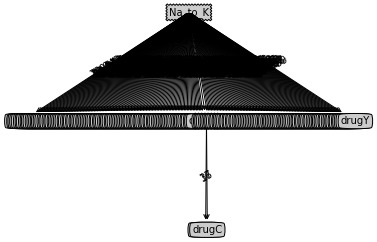

In [7]:
if __name__ == "__main__":
    data, featNames = loadDataSet('drug200.csv')
    dtTree = buildTree(data, featNames)
    print (dtTree) 
    treeplot.createPlot(dtTree)